In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time
import json
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoSuchWindowException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException

In [2]:
stock = input("종목 코드를 입력하시오")

In [3]:
options = Options()
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36')
driver = webdriver.Chrome(options=options)
url = f"https://finance.yahoo.com/quote/{stock}/history?p={stock}"
driver.get(url)
driver.maximize_window()
driver.implicitly_wait(10)


In [4]:
actions = driver.find_element(By.CSS_SELECTOR, 'body') #웹 페이지 스크롤 동작은 BODY에서 하기 # BODY태그를 선택하는 CSS여서 CLASS를 사용하는것이 아님
# 그 후 send_keys를 활용하여 END키 입력을 주어서 페이지 스크롤을 활용하여 계속 내려가는것

for scroll in range(1, 5):
    time.sleep(2)
    actions.send_keys(Keys.END)

In [5]:
# 리스트 초기화
date = []
close = []

# 웹 페이지에서 필요한 요소를 찾기 
tbody_rows = driver.find_elements(By.CSS_SELECTOR, "tr.BdT.Bdc\\(\\$seperatorColor\\).Ta\\(end\\).Fz\\(s\\).Whs\\(nw\\)")

print(f"Found {len(tbody_rows)} rows.")

# 각 행을 순회하며 정보를 추출 
#예외가 발생해도 다음 행으로 넘어가려면 반복문이 for문 안에 있어야함.
for row in tbody_rows:
    try:
        date_cell = row.find_element(By.CSS_SELECTOR, "td.Py\\(10px\\).Ta\\(start\\).Pend\\(10px\\)")
        close_cell = row.find_elements(By.CSS_SELECTOR, "td.Py\\(10px\\).Pstart\\(10px\\)")[3] #"("할때 양쪽에 하는게 아니라 앞에서 \\2개만 하기
        date.append(date_cell.text)                   
        close.append(close_cell.text)
        
    except Exception as e:
        print(f"An error occurred in row {row}: {e}")
        continue  # 예외가 발생하면 다음 행으로 넘어간다.


Found 251 rows.


In [6]:
import pandas as pd
investing_list = pd.DataFrame({"date" : date,
                              "close" : close})

In [7]:
investing_list

,date,close
0,"Sep 05, 2023",256.49
1,"Sep 01, 2023",245.01
2,"Aug 31, 2023",258.08
3,"Aug 30, 2023",256.90
4,"Aug 29, 2023",257.18
...,...,...
246,"Sep 12, 2022",304.42
247,"Sep 09, 2022",299.68
248,"Sep 08, 2022",289.26
249,"Sep 07, 2022",283.70


In [8]:
investing_list.to_csv("investing_list.csv", index = False)

In [9]:
investing_list = pd.read_csv("investing_list.csv")

investing_list['date'] = pd.to_datetime(investing_list['date'], format='%b %d, %Y')
investing_list = investing_list.sort_values('date')
investing_list.to_csv("investing_list.csv", index=False)

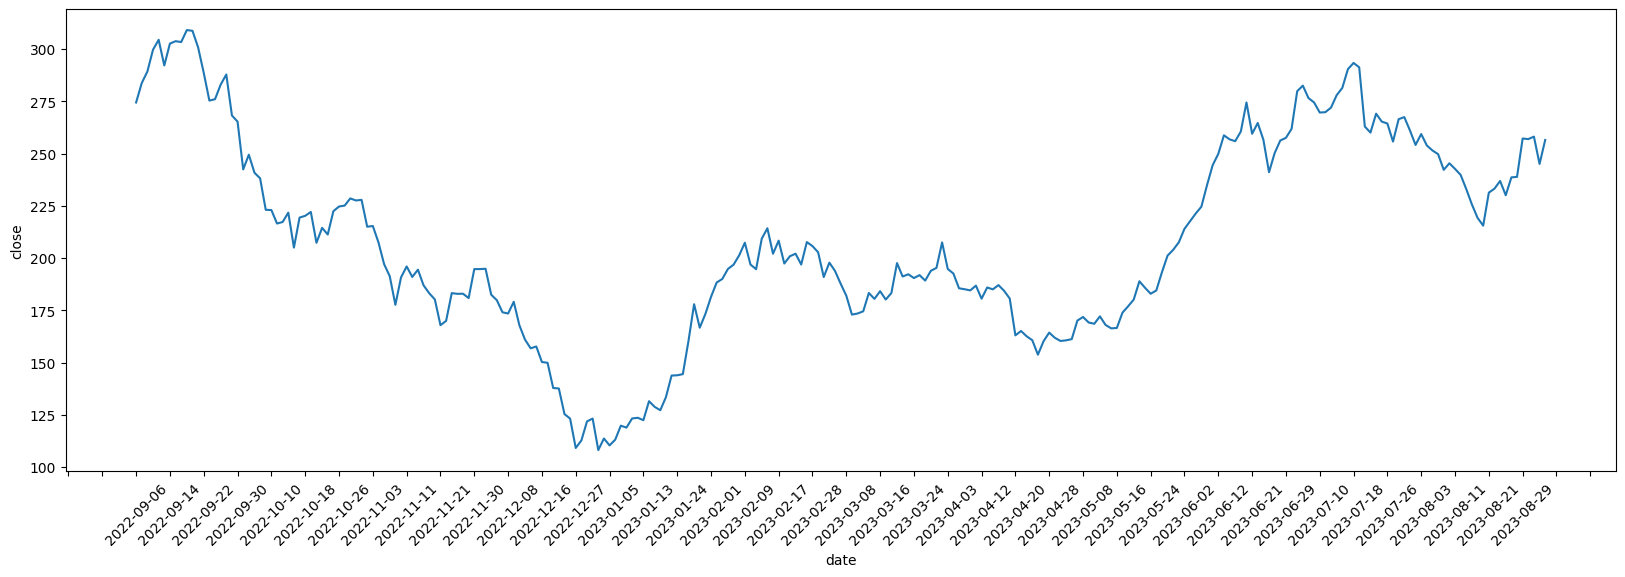

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

investing_list = pd.read_csv("investing_list.csv")

plt.figure(figsize = (20,6)) #plt.figure는 새로운 그래프를 생성 / 가로크기 20, 세로크기 6
sns.lineplot(data=investing_list, x = "date", y = "close")#line선 그래프, data는 어떤 데이터 쓸지

plt.xticks(rotation=45)#xticks()는 x축 레이블의 속성을 설정
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))#gca는 현재의 축 객체 / set_major_locator는 x축의 주 눈금 위치를 설정 / MaxNLocator(nbins=20) x축 레이블 개수 제한


plt.show()

           date   close
0    2022-09-06  274.42
1    2022-09-07  283.70
2    2022-09-08  289.26
3    2022-09-09  299.68
4    2022-09-12  304.42
..          ...     ...
246  2023-08-29  257.18
247  2023-08-30  256.90
248  2023-08-31  258.08
249  2023-09-01  245.01
250  2023-09-05  256.49

[251 rows x 2 columns]


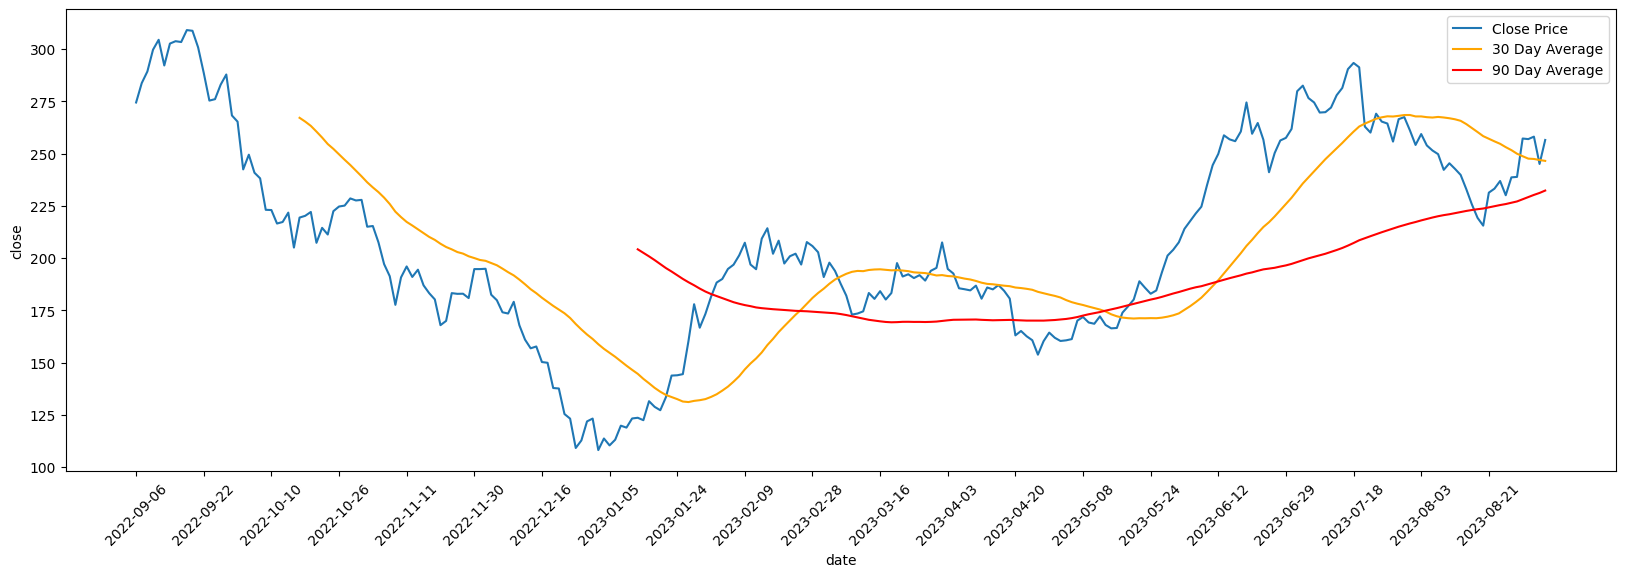

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
investing_list = pd.read_csv("investing_list.csv")
investing_list.sort_values('date', inplace=True) #inplace: 제자리에 / 순서 정렬
print(investing_list)

# 이동평균 계산
investing_list['30_day_avg'] = investing_list['close'].rolling(window=30).mean() #windoe창이 이동하듯이, rolling하여 특정 구간 값을 구해줌. 여기서는 mean이니 평균
investing_list['90_day_avg'] = investing_list['close'].rolling(window=90).mean()

# 그래프 그리기
plt.figure(figsize=(20, 6))
sns.lineplot(data=investing_list, x="date", y="close", label='Close Price')
sns.lineplot(data=investing_list, x="date", y="30_day_avg", label='30 Day Average', color='orange')
sns.lineplot(data=investing_list, x="date", y="90_day_avg", label='90 Day Average', color='red')

# x축 레이블 설정
plt.xticks(rotation=45)
ax = plt.gca()

# 선택적으로 일정 간격의 날짜만 x축에 표시
total_dates = len(investing_list['date'])
dates_to_show = investing_list['date'][::total_dates // 20]#:: 슬라이싱[start:stop:step] / step은 몇개의 원소 건너뛸것인지.일정 간격으로 날짜 선택

ax.set_xticks(dates_to_show) #x축에 표시될 눈금의 위치 설정
ax.set_xticklabels(dates_to_show, rotation=45)


plt.show()


           date   close
0    2022-09-06  274.42
1    2022-09-07  283.70
2    2022-09-08  289.26
3    2022-09-09  299.68
4    2022-09-12  304.42
..          ...     ...
246  2023-08-29  257.18
247  2023-08-30  256.90
248  2023-08-31  258.08
249  2023-09-01  245.01
250  2023-09-05  256.49

[251 rows x 2 columns]


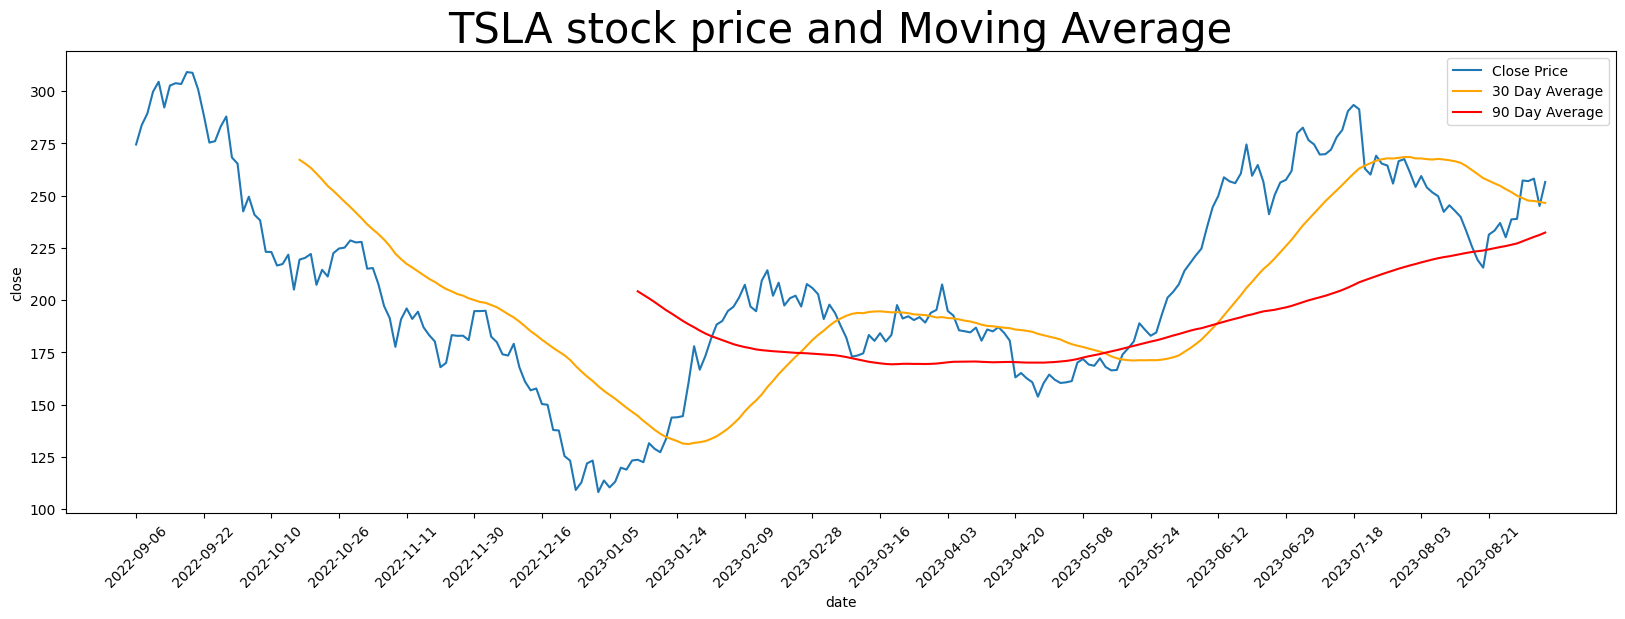

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#그래프 제목 설정

# 데이터 로드
investing_list = pd.read_csv("investing_list.csv")
investing_list.sort_values('date', inplace=True) #inplace: 제자리에 / 순서 정렬
print(investing_list)

# 이동평균 계산
investing_list['30_day_avg'] = investing_list['close'].rolling(window=30).mean() #windoe창이 이동하듯이, rolling하여 특정 구간 값을 구해줌. 여기서는 mean이니 평균
investing_list['90_day_avg'] = investing_list['close'].rolling(window=90).mean()

# 그래프 그리기
plt.figure(figsize=(20, 6))#크기
sns.lineplot(data=investing_list, x="date", y="close", label='Close Price')
sns.lineplot(data=investing_list, x="date", y="30_day_avg", label='30 Day Average', color='orange')
sns.lineplot(data=investing_list, x="date", y="90_day_avg", label='90 Day Average', color='red')

# x축 레이블 설정
plt.xticks(rotation=45)
ax = plt.gca()

# 선택적으로 일정 간격의 날짜만 x축에 표시
total_dates = len(investing_list['date'])
dates_to_show = investing_list['date'][::total_dates // 20]#:: 슬라이싱[start:stop:step] / step은 몇개의 원소 건너뛸것인지.일정 간격으로 날짜 선택

ax.set_xticks(dates_to_show) #x축에 표시될 눈금의 위치 설정
plt.title(f"{stock} stock price and Moving Average", fontsize = 30, ha = "center") #plt.figure보다 뒤에 나와야지 이름이 입력됌

plt.show()


In [13]:
def add(a,b):
    result = a + b
    print(f"{a} + {b} = {result}") #출력값 보여주기
    return result

def minu(a,b):
    result = a - b
    print(f"{a} - {b} = {result}")
    return result

def div(a,b):
    result = int(a /  b)
    print(f"{a} / {b} = {result}")
    return result

def mul(a,b):
    result = a * b
    print(f"{a} * {b} = {result}")
    return result

#사칙연산자 이외의 문자가 주어지는 경우 false(제곱은 안됌)


for i in range(1,3):
    a, op, b = input("식을 입력해주세요(띄어쓰기로 구분: 0 <= a,c < 100 예시: a + c    ").split() #split 기준으로 값 나눠줘서 각각에 값 넣기
    a, b = int(a), int(b)
    if a < 0 or a > 100 or b < 0 or b > 100:
        print("값을 다시 입력해주세요. 0<= a, b <= 100")
    elif op not in ["+", "-", "/", "*"]:
        print("False") 
    else: 
        if op == "+":
            add(a,b)
        if op == "-":
            minu(a,b)
        if op == "/":
            div(a,b)
        if op == "*":
            mul(a,b)



3 * 8 = 24
False
